In [2]:
# load all the libraries 
import email.parser 
import os, sys, stat
import shutil
import pandas as pd
import numpy as np
import glob, os

# import libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random
from sklearn.linear_model import LogisticRegression  as LogReg
from PIL import Image
# suppress warnings
import matplotlib.image as mpimg
warnings.filterwarnings ( 'ignore' )
%matplotlib inline
import os 
import nltk
import re
import time
import nltk.tag.stanford as st
from nltk.corpus import stopwords # Import the stop word list
from sklearn.feature_extraction.text import CountVectorizer        
from nltk.stem.porter import PorterStemmer
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier 
import sklearn.grid_search as gs
from sklearn.cross_validation import cross_val_score
import seaborn as sns
import heapq
from sklearn.svm import SVC
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler as Standardize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from bs4 import BeautifulSoup
import random
random.seed(9001)

In [28]:
# Extract emails 
def ExtractSubPayload (filename):


    fp = open(filename)
   
    msg = email.message_from_file(fp)
    payload = msg.get_payload()
    if type(payload) == type(list()) :
        payload = payload[0] # only use the first part of payload
    sub = msg.get('subject')
    sub = str(sub)
    if type(payload) != type('') :
        payload = str(payload)

    return sub + payload


In [27]:
# Declare a dataframe 
eml_df = pd.DataFrame(columns=['File_Nm','Content'])


In [5]:

# Extract he emails wih function defined above  and extract the contents from html tags
srcdir = "C:\Users\hgarg\Documents\python\Spam\CSDMC2010_SPAM\TRAINING"
files = os.listdir(srcdir)
for i, file in enumerate(files):
    
    srcpath = os.path.join(srcdir, file)

    src_info = os.stat(srcpath)

    body = ExtractSubPayload (srcpath)
    soup = BeautifulSoup(body,"lxml")

# kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

# get text
    text = soup.get_text()
  
    eml_df.loc[i,"File_Nm"] = file
    eml_df.loc[i,"Content"] = text

In [6]:
#Look the contents
eml_df

,File_Nm,Content
0,TRAIN_00000.eml,One of a kind Money maker! Try it for free!Fro...
1,TRAIN_00001.eml,link to my webcam you wanted Wanna see sexuall...
2,TRAIN_00002.eml,Re: How to manage multiple Internet connection...
3,TRAIN_00003.eml,[SPAM] Give her 3 hour rodeoEnhance your desi...
4,TRAIN_00004.eml,Best Price on the netf5f8m1 (suddenlysusan@Sto...
5,TRAIN_00005.eml,linux.ie mailing list memberships reminderThis...
6,TRAIN_00006.eml,Re: Apple Sauced...againAt 1:16 AM -0400 on 10...
7,TRAIN_00007.eml,Re: results for giant mass-check (phew)I never...
8,TRAIN_00008.eml,"Re: RPM's %post, %postun etcHave you tried reb..."
9,TRAIN_00009.eml,"Re: Fwd: Re: Kde 3.5 ...On 9 May 2010 17:00, L..."


In [7]:
# cleanse the content

# convert the text into lower

#df= df.replace({r'[^\x00-\x7F]+':''}, regex=True)
eml_df['Content'] = eml_df['Content'].str.lower()
#eml_df= eml_df.replace({r'[^\x00-\x7F\x80-\xFF\u0100-\u017F\u0180-\u024F\u1E00-\u1EFF]':''}, regex=True)
# replace all the non alphanumeric characters    
eml_df['Content'] = eml_df['Content'].str.replace("[^a-zA-Z]", " ")
eml_df['Content'] = eml_df['Content'].str.encode('latin1')

#replace spam word

eml_df['Content'] = eml_df['Content'].str.replace("spam", " ")


#eml_df['Content'] = eml_df['Content'].apply(lambda x: x.decode('unicode_escape').\
                                          #encode('ascii', 'ignore').\
                                          #strip())


In [8]:
# check df again 
eml_df.head()

,File_Nm,Content
0,TRAIN_00000.eml,one of a kind money maker try it for free fro...
1,TRAIN_00001.eml,link to my webcam you wanted wanna see sexuall...
2,TRAIN_00002.eml,re how to manage multiple internet connection...
3,TRAIN_00003.eml,give her hour rodeoenhance your desire ...
4,TRAIN_00004.eml,best price on the netf f m suddenlysusan sto...


In [9]:
# create another df with ham and spam category 
eml_labeldf= pd.read_csv("SPAMTrain.label", sep=' ',names = ["Label", "File_Nm"])
eml_labeldf.head()

,Label,File_Nm
0,0,TRAIN_00000.eml
1,0,TRAIN_00001.eml
2,1,TRAIN_00002.eml
3,0,TRAIN_00003.eml
4,0,TRAIN_00004.eml


In [12]:
# merge the df to make final df 
eml_final_df = pd.merge(eml_df, eml_labeldf, how='inner', on ="File_Nm")
eml_final_df.head()

,File_Nm,Content,Label
0,TRAIN_00000.eml,one of a kind money maker try it for free fro...,0
1,TRAIN_00001.eml,link to my webcam you wanted wanna see sexuall...,0
2,TRAIN_00002.eml,re how to manage multiple internet connection...,1
3,TRAIN_00003.eml,give her hour rodeoenhance your desire ...,0
4,TRAIN_00004.eml,best price on the netf f m suddenlysusan sto...,0


In [13]:
# check all the stop words
stops = set(stopwords.words("english"))


In [29]:
# function to make corpus of one word 

def vector_fit(corpus, min_df):
##Display feature names##
#Convert a collection of text documents to a matrix of token counts#

    vectorizer = CountVectorizer(analyzer = "word",  lowercase = True,stop_words = stops
                             ,min_df= min_df,max_features = 5000)
    corpus_data_features = vectorizer.fit_transform(corpus)
    corpus_data_array = corpus_data_features.toarray()
    return  vectorizer.get_feature_names(), corpus_data_array


#function call for whole data
feature_name , x = vector_fit(eml_final_df['Content'].values,4)
y =eml_final_df['Label'].values
print feature_name[0:25]

[u'aa', u'ab', u'abandoned', u'ability', u'able', u'abroad', u'absolute', u'absolutely', u'abuse', u'ac', u'academic', u'academy', u'acceleration', u'accept', u'acceptable', u'accepted', u'access', u'accessible', u'accessing', u'according', u'account', u'accounting', u'accounts', u'accurate', u'accurately']


In [30]:

spam_df= eml_final_df.loc[eml_final_df['Label']==0]
feature_name_spam ,x_spam = vector_fit(spam_df['Content'].values,4)

ham_df= eml_final_df.loc[eml_final_df['Label']==1]

feature_name_ham ,x_ham= vector_fit(ham_df['Content'].values,4)


In [31]:

# function to create datset of words  with counts in high ,low ,total

def df_list(x_srt , feature):
    dist = np.sum(x_srt, axis=0)
    

    # initializse list
    word_list = []
    count_list=[]
    # get the count and feature name
    for tag, count in zip(feature , dist):
    
    # apeend the list with count and feature name
        word_list.append(tag)
        count_list.append(count)
        
    # create dataset
    df = pd.DataFrame()
    df['word'] = word_list
    df['count'] = count_list
    #return dataset
    return df

In [105]:

# Create dataset will all stats counts ,frequency
# return dataset of  total ,hihg , low
df_total = df_list(x , feature_name)
df_high = df_list(x_spam , feature_name_spam)
df_low = df_list(x_ham , feature_name_ham)

# join the dataset total with high and low dataset using left outer join
new_df = pd.merge(df_total, df_high, on='word', how='left')
final_word_df = pd.merge(new_df, df_low, on='word', how='left')
# replace the 'Nan with 0'
final_word_df.fillna(0, inplace=True)
final_word_df[['count_y', 'count']] = final_word_df[['count_y', 'count']].astype(int)
#Rename the default columns to readable columns
final_word_df.rename(columns={'count_x': 'Total_Count', 'count_y': 'High_Count', 'count': 'Low_Count'}, inplace=True)

# Get the frequencies
final_word_df["High_freq"]= final_word_df['High_Count']/x_hicount
final_word_df["Low_freq"]= final_word_df['Low_Count']/x_lowcount
final_word_df["High - Low"] = (final_word_df["High_freq"]- final_word_df["Low_freq"])*100
 
final_word_df.head()

,word,Total_Count,High_Count,Low_Count,High_freq,Low_freq,High - Low
0,aa,116,62,54,0.0124,0.0108,0.16
1,ab,57,35,22,0.0070,0.0044,0.26
2,abandoned,31,20,11,0.0040,0.0022,0.18
3,ability,125,38,87,0.0076,0.0174,-0.98
4,able,340,75,265,0.0150,0.0530,-3.80


In [32]:

# For each, print the vocabulary word and the number of times it and sort them in desecnding order based on count 
# appears in the data set for full, neg ,pos datastet
def sort_list(x_srt , feature):
    dist = np.sum(x_srt, axis=0)
    

# initializse list
    word_list = []
# get the count and feature name
    for tag, count in zip(feature , dist):
        
 
         word_list.append((tag,count))
# sort the list        
    word_list.sort(key=itemgetter(1), reverse=True)
    return  word_list
# print the list

word_list = sort_list(x , feature_name)
word_list_spam = sort_list( x_spam , feature_name_spam)
word_list_ham = sort_list(x_ham , feature_name_ham)
print "full datset word list:", word_list[1:20]
print('\n')
print "Pos datset word list:", word_list_spam[1:20]
print('\n')
print "Neg datset word list:", word_list_ham[1:20]

full datset word list: [(u'com', 7499), (u'org', 5664), (u'debian', 5233), (u'lists', 4238), (u'www', 4224), (u'email', 3048), (u'net', 2985), (u'list', 2973), (u'unsubscribe', 2780), (u'one', 2470), (u'get', 2392), (u'use', 2217), (u'wrote', 2113), (u'new', 2109), (u'time', 1915), (u'linux', 1799), (u'mail', 1748), (u'like', 1732), (u'would', 1727)]


Pos datset word list: [(u'com', 1251), (u'http', 1100), (u'free', 1078), (u'click', 1037), (u'one', 842), (u'new', 817), (u'please', 814), (u'mail', 797), (u'us', 755), (u'get', 750), (u'content', 697), (u'time', 691), (u'also', 639), (u'money', 636), (u'business', 623), (u'information', 620), (u'list', 615), (u'people', 595), (u'unsubscribe', 593)]


Neg datset word list: [(u'com', 6248), (u'org', 5387), (u'debian', 5233), (u'lists', 4050), (u'www', 3643), (u'net', 2590), (u'list', 2358), (u'unsubscribe', 2187), (u'wrote', 2097), (u'use', 1787), (u'email', 1781), (u'linux', 1702), (u'get', 1642), (u'one', 1628), (u'users', 1487), (u'use

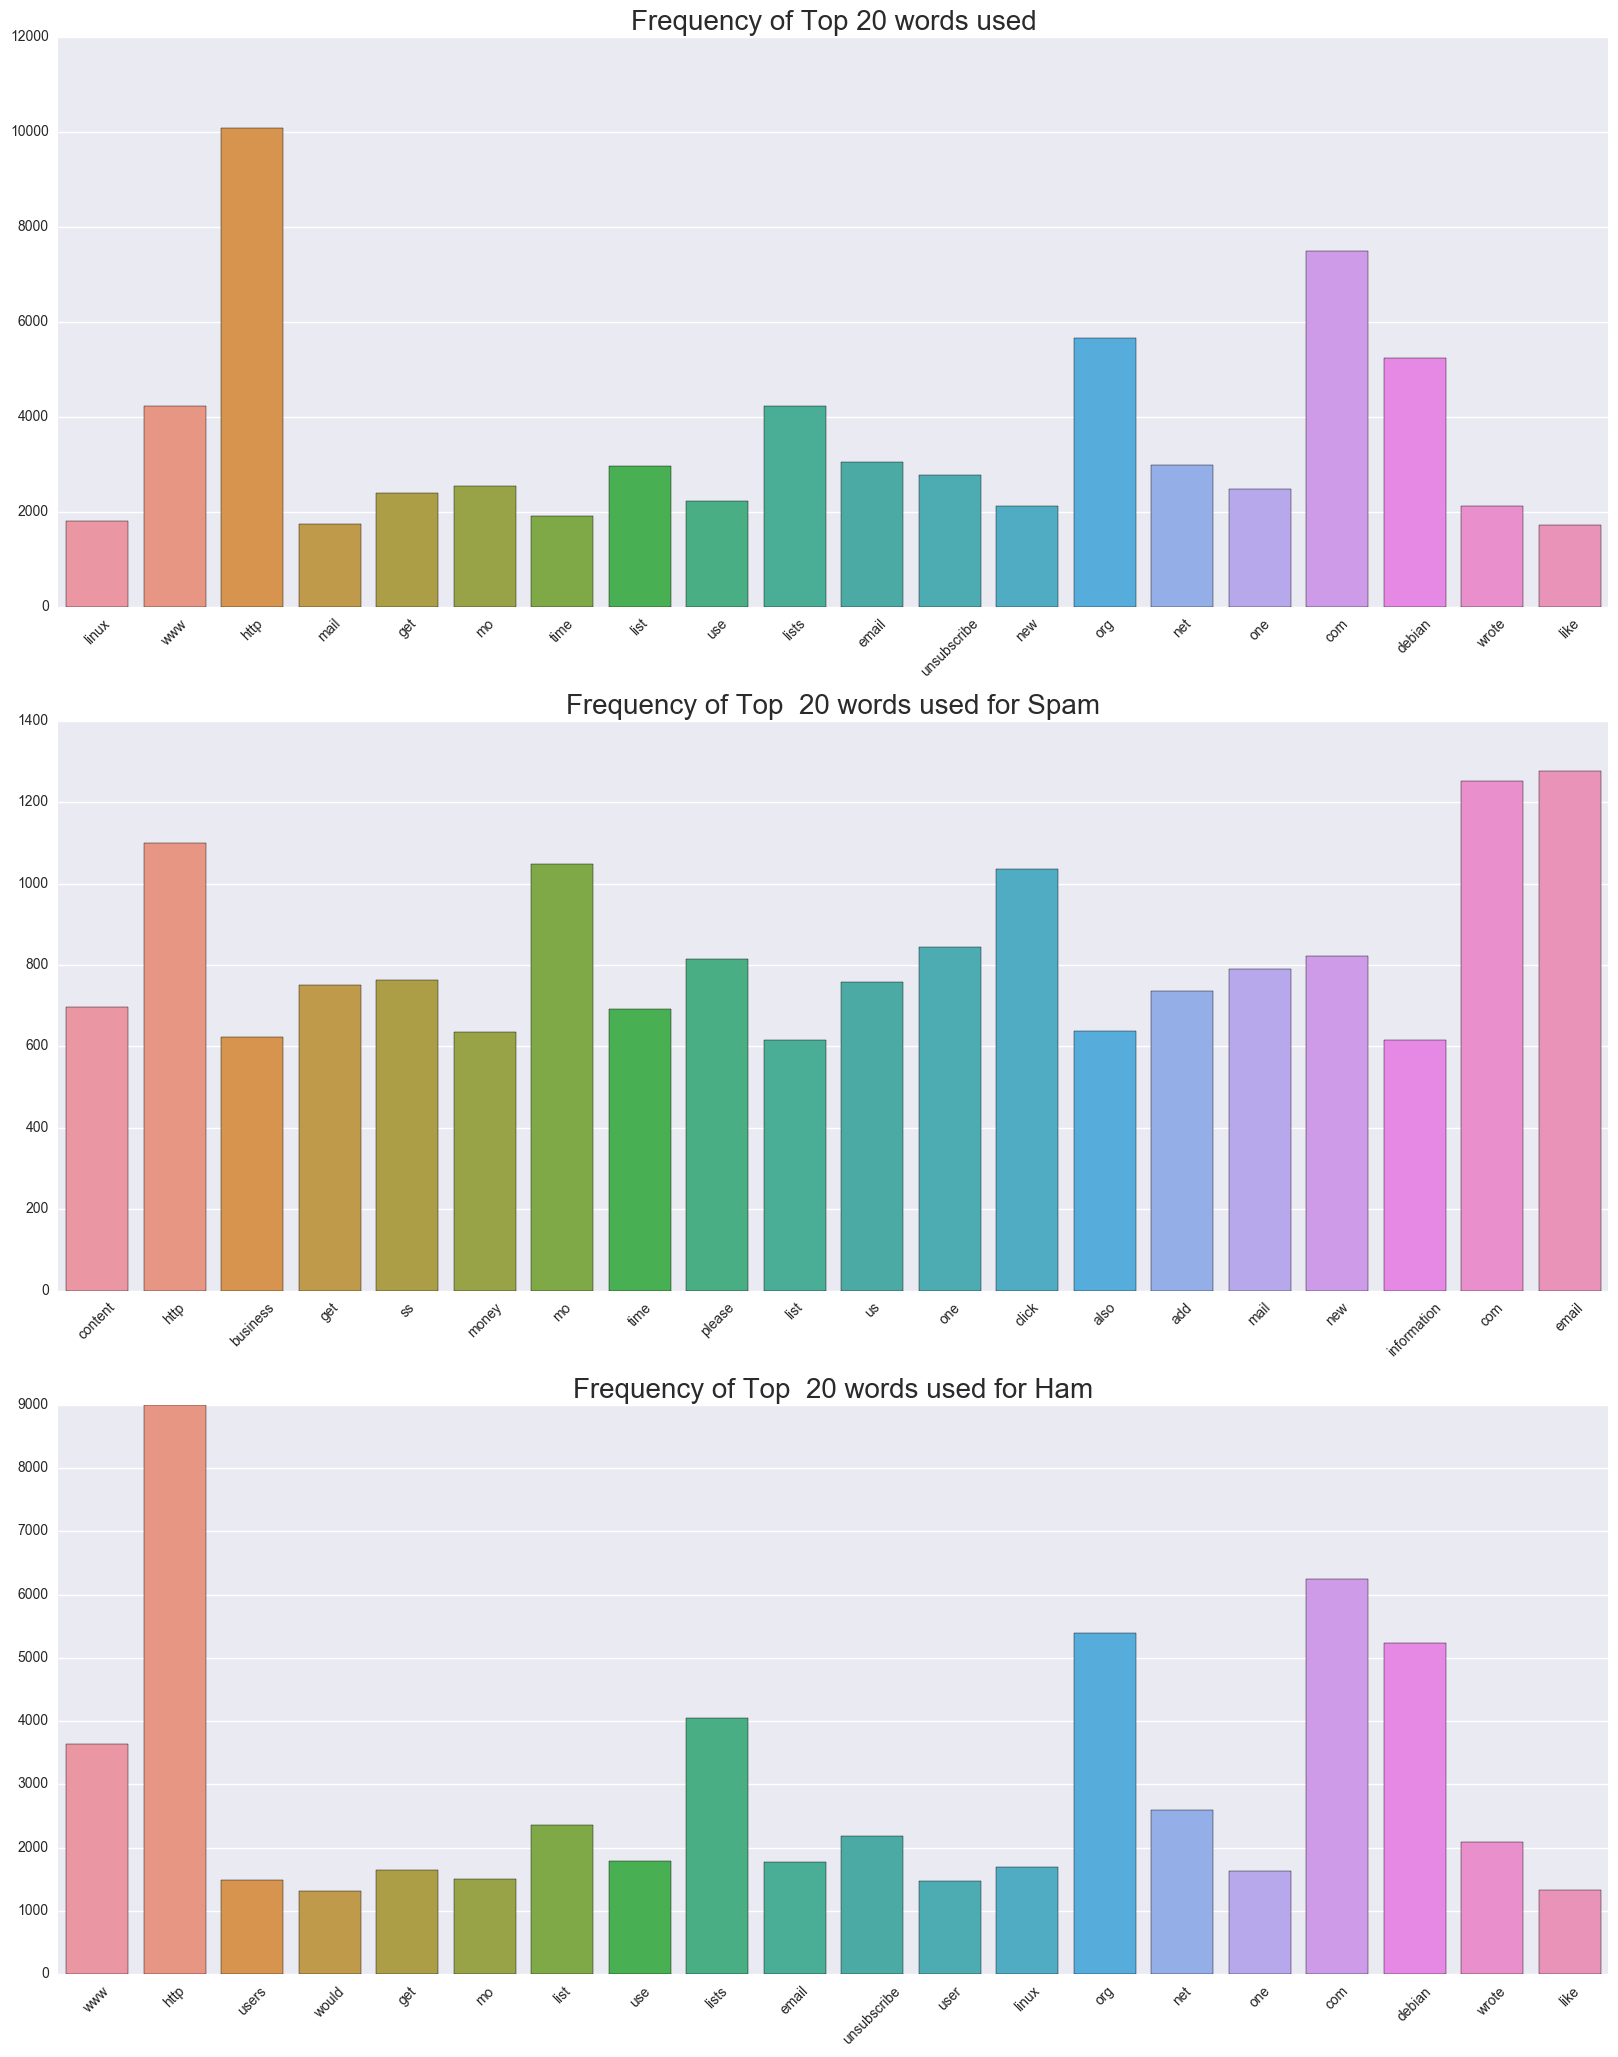

In [108]:
# plot the bar graph for top 20 occuring words  for full,pos ,neg dataset 
fig = plt.figure(figsize=(20,25))

#fig = plt.figure(figsize=(15,8))
wordsdict = {}
wordsdict_spam = {}
wordsdict_ham = {}
# Pick top 10 words from sorted list 
for w,wpos,wneg in zip(word_list[0:20],word_list_spam[0:20] ,word_list_ham[0:20])  :
# create a dictionary 
    wordsdict[w[0]] = w[1]
   
    wordsdict_spam[wpos[0]] = wpos[1]
    
    wordsdict_ham[wneg[0]] = wneg[1]

ax1 = fig.add_subplot(311)   
    
# plot the graph
#ax1.bar(range(len(wordsdict)), wordsdict.values(), align='center')
ax1 = sns.barplot(range(len(wordsdict)), wordsdict.values())
ax1.set_xticks(range(len(wordsdict)))
ax1.set_xticklabels(wordsdict.keys(),rotation=45,alpha =1.0)
ax1.set_title( "Frequency of Top 20 words used" ,alpha =5.0 ,fontsize = 20)

ax2 = fig.add_subplot(312)   
    
# plot the graph
ax2= sns.barplot(range(len(wordsdict_spam)), wordsdict_spam.values())
ax2.set_xticks(range(len(wordsdict_spam)))
ax2.set_xticklabels(wordsdict_spam.keys(),rotation=45,alpha =1.0)
ax2.set_title( "Frequency of Top  20 words used for Spam",alpha =5.0 ,fontsize = 20)


ax3 = fig.add_subplot(313)   
    
# plot the graph
ax2= sns.barplot(range(len(wordsdict_ham)), wordsdict_ham.values())
ax3.set_xticks(range(len(wordsdict_ham)))
ax3.set_xticklabels(wordsdict_ham.keys(),rotation=45,alpha =1.0)
ax3.set_title( "Frequency of Top  20 words used for Ham" ,alpha =5.0,fontsize = 20)

plt.show()


In [33]:

# No. of training points
def sk_split(x,y):
    n = len(x)
    n_train = int(n * 2.0 / 3.0)

# Random 2/3rd train, remaining test
    perm = np.random.permutation(n)
    y_train = y[perm[0:n_train]]
    x_train = x[perm[0:n_train]]
    y_test = y[perm[n_train:]]
    x_test = x[perm[n_train:]]
    return x_train , x_test ,y_train ,y_test

In [42]:
# Spilt the data 
x_train , x_test , y_train , y_test  =  sk_split(x,y)



In [35]:
#Function for computing the accuracy a given model on the entire test set, the accuracy on class 0 in the test set
#and the accuracy on class 1
score = lambda model, x_test, y_test: pd.Series([model.score(x_test, y_test), 
                                                 model.score(x_test[y_test==0], y_test[y_test==0]),
                                                 model.score(x_test[y_test==1], y_test[y_test==1])],
                                                index=['overall accuracy', 'accuracy on class 0', 'accuracy on class 1'])

In [36]:
#A model that labels everything 1
class  Spam_model(object):
    def predict(self, x):
        return np.array([1] * len(x))
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)
    
#A model that labels everything 0
class Ham_model(object):
    def predict(self, x):
        return np.array([0] * len(x))
    
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)


#A model that randomly labels things
class Random_model(object):
    def predict(self, x):
        return np.random.randint(0, 2, len(x))
    
    def score(self, x, y):
        y_pred = self.predict(x)
        y_err = y - y_pred
        return len(y_err[y_err == 0]) * 1. / len(y_err)

In [37]:
# call all the base models
spam_model = Spam_model()
spam_model_scores = score(spam_model, x_test, y_test)

ham_model = Ham_model()
ham_model_scores = score(ham_model, x_test, y_test)

random_model = Random_model()
random_model_scores = score(random_model, x_test, y_test)

In [38]:

#Score Dataframe
score_df = pd.DataFrame({'pos model': spam_model_scores,
                         'neg model': ham_model_scores,
                         'random model': random_model_scores})
score_df

,neg model,pos model,random model
overall accuracy,0.316701,0.683299,0.485793
accuracy on class 0,1.000000,0.000000,0.498906
accuracy on class 1,0.000000,1.000000,0.473631


In [39]:
#Check all the classifiers to see which one is good
#Unweighted logistic regression
unweighted_logistic = LogReg()
unweighted_logistic.fit(x_train, y_train)

unweighted_log_scores = score(unweighted_logistic, x_test, y_test)



#Weighted logistic regression
weighted_logistic = LogReg(class_weight='balanced')
weighted_logistic.fit(x_train, y_train)

weighted_log_scores = score(weighted_logistic, x_test, y_test)


#LDA
lda = LDA()
lda.fit(x_train, y_train)

lda_scores = score(lda, x_test, y_test)


#QDA
qda = QDA()
qda.fit(x_train, y_train)

qda_scores = score(qda, x_test, y_test)


#Decision Tree
tree = DecisionTree(max_depth=6)
tree.fit(x_train, y_train)

tree_scores = score(tree, x_test, y_test)



#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_scores = score(rf, x_test, y_test)


rf_wt = RandomForestClassifier(class_weight='balanced')
rf_wt.fit(x_train, y_train)
rf_wt_scores = score(rf_wt, x_test, y_test)


#SVM
clfsvm = SVC(kernel ='linear')
clfsvm.fit(x_train, y_train)
svm_scores = score(clfsvm, x_test, y_test)

clfsvm_wt = SVC(kernel ='linear',class_weight='balanced')
clfsvm_wt.fit(x_train, y_train)
svmwt_scores = score(clfsvm_wt, x_test, y_test)


#Score Dataframe
score_df = pd.DataFrame({#'knn': knn_scores, 
                         'unweighted logistic': unweighted_log_scores,
                         'weighted logistic': weighted_log_scores,
                         'lda': lda_scores,
                         'qda': qda_scores,
                         'tree': tree_scores,
                         'rf': rf_scores,
                          'weighted rf': rf_wt_scores,
                         'svm': svm_scores,
                         'weighted svm':svmwt_scores
                         })
score_df

,lda,qda,rf,svm,tree,unweighted logistic,weighted logistic,weighted rf,weighted svm
overall accuracy,0.688150,0.672904,0.959113,0.970201,0.881497,0.982675,0.981982,0.959113,0.969508
accuracy on class 0,0.698031,0.853392,0.964989,0.960613,0.831510,0.978118,0.980306,0.954048,0.958425
accuracy on class 1,0.683570,0.589249,0.956389,0.974645,0.904665,0.984787,0.982759,0.961460,0.974645


In [40]:
# define funtion to create n-grams
def ngramvector_fit(corpus, min_df):
##Display feature names##
#Convert a collection of text documents to a matrix of token counts#

    vectorizer = CountVectorizer(ngram_range=(1,3),
                                    stop_words = stops
                             ,min_df= min_df,max_features = 5000)
    corpus_data_features = vectorizer.fit_transform(corpus)
    corpus_data_array = corpus_data_features.toarray()
    return  vectorizer.get_feature_names(), corpus_data_array


#function call for whole data
feature_name , x = ngramvector_fit(eml_final_df['Content'].values,4)
y =eml_final_df['Label'].values
feature_name[4900:5000]

[u'writing',
 u'written',
 u'wrong',
 u'wrote',
 u'wrote camale',
 u'wrote fri',
 u'wrote hello',
 u'wrote hi',
 u'wrote mon',
 u'wrote sat',
 u'wrote snip',
 u'wrote thu',
 u'wrote tue',
 u'wrote wed',
 u'ws',
 u'www',
 u'www debian',
 u'www debian org',
 u'www facebook',
 u'www facebook com',
 u'www inphonic',
 u'www inphonic com',
 u'www jabber',
 u'www jabber com',
 u'www linux',
 u'www linux ie',
 u'www newsisfree',
 u'www newsisfree com',
 u'www quicktopic',
 u'www quicktopic com',
 u'www student',
 u'www student montefiore',
 u'www theregister',
 u'www theregister co',
 u'xent',
 u'xent com',
 u'xent com behalf',
 u'xent com mailman',
 u'xent com mailto',
 u'xf',
 u'xfce',
 u'xfs',
 u'xim',
 u'xim assassin',
 u'ximian',
 u'xine',
 u'xml',
 u'xorg',
 u'xorg conf',
 u'xorg video',
 u'xp',
 u'xquartz',
 u'xr',
 u'xserver',
 u'xserver xorg',
 u'xserver xorg video',
 u'xvcj',
 u'xx',
 u'xxx',
 u'yahoo',
 u'yahoo com',
 u'yahoo com info',
 u'yahoo com pt',
 u'yahoo groups',
 u'yahoo g

In [41]:
# create df with frequencies of feature 
word_count_sum = pd.DataFrame(x.sum(axis=0).T, columns=['count'])
word_count_sum['ngram'] = feature_name
word_count_sum.sort_values('count')[100:500]

,count,ngram
3340,32,plenty
3365,32,porn
1112,32,dev hda
1716,32,fu
1108,32,detect
4789,32,web page click
4214,32,stop receiving messages
1685,32,freeze
4784,32,weak
4801,32,wed apr pm


In [43]:
# Run the best estimator to  check score on test and train 
clfSVM = SVC(kernel = 'linear')
clfSVM.fit(x_train, y_train)
# score on test and train
score_train = clfSVM.score(x_train,y_train)
Score_test = clfSVM.score(x_test,y_test)
Score_test_0 = clfSVM.score(x_test[y_test==0], y_test[y_test==0])
Score_test_1 = clfSVM.score(x_test[y_test==1], y_test[y_test==1])

# Print the Scores
print "Train Score:",score_train
print "Test Score:",Score_test
print "Test Score for Class 0:", Score_test_0
print "Test Score for Class 1:", Score_test_1

Train Score: 1.0
Test Score: 0.966735966736
Test Score for Class 0: 0.956989247312
Test Score for Class 1: 0.971370143149


In [44]:
# find the top 50 nad Low 50 coefficents 
top = np.argmax(clfSVM.coef_)
bot = np.argmin(clfSVM.coef_)
coef = clfSVM.coef_.T
# Pick top 50 and low 50 in thhe sorted list
top50 = heapq.nlargest(30, range(len(coef)), coef.take)
bot50 = heapq.nsmallest(30, range(len(coef)), coef.take)
#append the features names in list and print the list
top = []
bot = []
print "\nAssociated with Ham :\n"
for each in top50:
    top.append(feature_name[each]) 
    print feature_name[each]
print "\nAssociated with  Spam:\n"
for each in bot50:
    bot.append(feature_name[each])
    print feature_name[each]


Associated with Ham :

wrote
anyway
date
stocks
calling
edu
around
characters
artists
said
numerous
national
review
java
jim
org
fwd
fork
cheers
forwarded
www
problem
similar
mit
bayes
usual
seems
html
sept
global

Associated with  Spam:

hot
en
visit
website
times
vous
see
remove
direct
curious
click
part
jul content
wed jul content
hibody
social
please
unsubscribe
receive
windows
money
order
life
important
remember
approved
save
big
facebook
lose


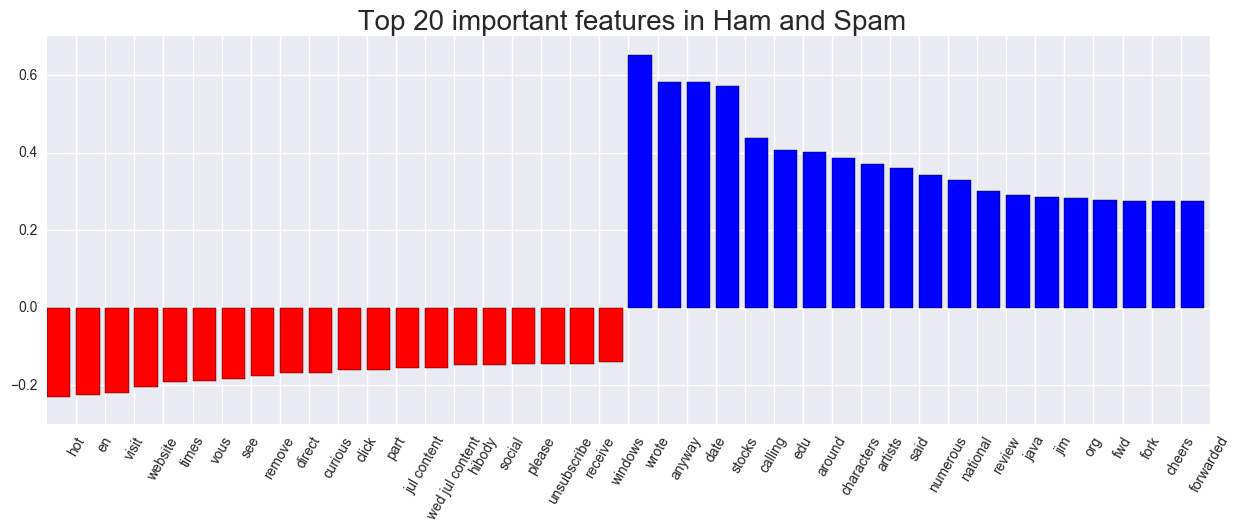

In [45]:
#plot the graph of 20 features in high and low income class
top_features =20
top_coefficients = np.hstack([bot50[:20], top50[:20]])
feature_list=[]
for each in top_coefficients:
    feature_list.append(feature_name[each]) 
  
 # create plot
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)

plt.xticks(np.arange(1, 1 + 2 * top_features),feature_list,rotation =60)
#plt.xticklabels(feature_list , rotation=60, ha='right')
#plt.xticks( feature_list , rotation=60, ha='right')
plt.title(" Top 20 important features in Ham and Spam",alpha=2.0 ,fontsize = 20 )
plt.show()

In [46]:
df1 = pd.DataFrame(feature_name, columns=['ngram'])
df1['coeff'] = clfSVM.coef_[0]
df1.sort_values(by='coeff')

,ngram,coeff
1960,hot,-0.230566
1351,en,-0.225675
4744,visit,-0.221494
4797,website,-0.205222
4443,times,-0.191067
4754,vous,-0.188649
3917,see,-0.184676
3696,remove,-0.176733
1149,direct,-0.169225
969,curious,-0.167880


In [47]:
df1 = pd.DataFrame(feature_name, columns=['ngram'])
df1['coeff'] = clfSVM.coef_[0]
df1[df1.ngram.str.contains(' ')].sort_values(by='coeff')

,ngram,coeff
2301,jul content,-0.156994
4803,wed jul content,-0.156994
634,charset windows,-0.103512
3306,plain charset windows,-0.103512
746,com cgi,-0.100039
882,content transfer,-0.099273
4501,transfer encoding,-0.099273
883,content transfer encoding,-0.099273
2237,iso content transfer,-0.099261
1356,encoding bit,-0.095009


In [48]:
def term_viz(df, title, filename):
    bar_color = 'b'
    if df['coeff'].iloc[0] < 0:
        bar_color = 'r'
        df = df.iloc[::-1]  # reverse order
    ax = df.plot.barh(
        legend=False,
        color=bar_color
    )
    plt.gca().set_yticklabels(df.ngram)
    if df['coeff'].iloc[0] < 0:
        plt.gca().yaxis.tick_right()
        plt.xlim(-.25, 0)
    else:
        plt.xlim(0, .25)
    plt.savefig("plt_" + filename + ".png", bbox_inches='tight')
    plt.title(title)
    plt.xlabel("Influence on prediction")
    plt.show()

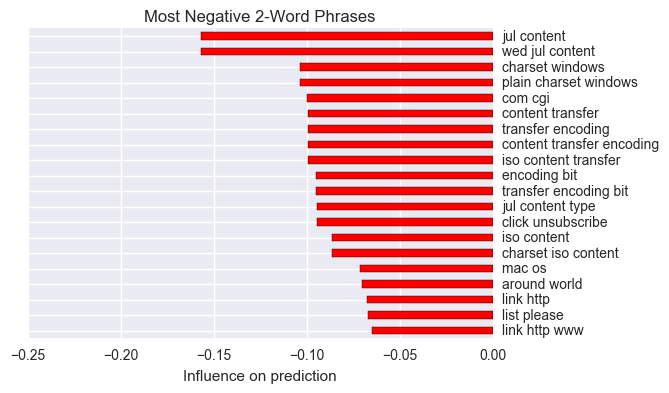

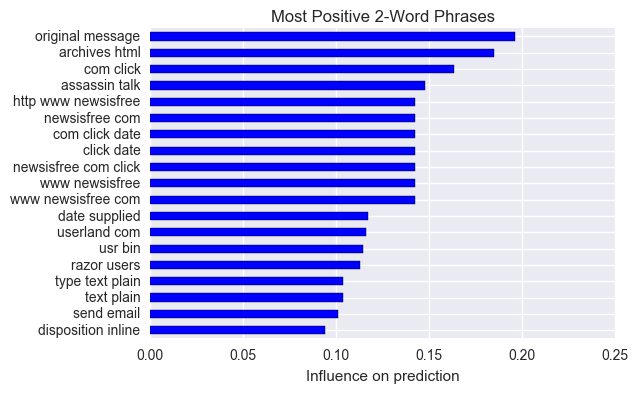

In [49]:
term_viz(df1[df1.ngram.str.contains(' ')].sort_values(by='coeff')[0:20], "Most Negative 2-Word Phrases", 'neg_2gram')
term_viz(df1[df1.ngram.str.contains(' ')].sort_values(by='coeff')[-20:-1], "Most Positive 2-Word Phrases", 'pos_2gram')